# Import Library

In [93]:
# import drive mount for google drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
# save filepath to variable for easier access
path="/content/drive/My Drive/Magister/Holistik/data3.csv"
# import pandas
import pandas as pd
# import matplotlib
import matplotlib.pyplot as plt
import matplotlib.lines as lines
# import seaborn
import seaborn as sns
# one hot encoder
from sklearn.preprocessing import OneHotEncoder
# oversampling using smote
from imblearn.over_sampling import SMOTE
# splitting dataset, import randomized search
from sklearn.model_selection import train_test_split, RandomizedSearchCV
# random forest
from sklearn.ensemble import RandomForestClassifier
# classification report
from sklearn.metrics import classification_report
# plot tree
from sklearn.tree import plot_tree
# import roc, confusion matrix
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix

Mounted at /content/drive


# Data Preparation

In [94]:
# read the data and store data into dataframe
dataframe=pd.read_csv(path)
# print a summary of the data
dataframe.head()

,grade_biologi_odd,kkm_biologi_odd,grade_biologi_even,kkm_biologi_even,grade_fisika_odd,kkm_fisika_odd,grade_fisika_even,kkm_fisika_even,grade_kimia_odd,kkm_kimia_odd,...,grade_bahasa_korea_odd,kkm_bahasa_korea_odd,grade_bahasa_korea_even,kkm_bahasa_korea_even,grade_bahasa_jerman_odd,kkm_bahasa_jerman_odd,grade_bahasa_jerman_even,kkm_bahasa_jerman_even,name,status
0,0,0,0,0.0,0.0,0,0.0,0,0.0,0.0,...,0,0,0.0,0,0.0,0,0.0,0,Sastra China,1.0
1,0,0,0,0.0,0.0,0,0.0,0,0.0,0.0,...,0,0,0.0,0,0.0,0,0.0,0,Psikologi,1.0
2,0,0,0,0.0,0.0,0,0.0,0,0.0,0.0,...,0,0,0.0,0,0.0,0,0.0,0,Seni Rupa dan Desain,1.0
3,0,0,0,0.0,0.0,0,0.0,0,0.0,0.0,...,0,0,0.0,0,0.0,0,0.0,0,Pendidikan Dokter,0.0
4,0,0,0,0.0,0.0,0,0.0,0,0.0,0.0,...,0,0,0.0,0,0.0,0,0.0,0,Sastra Inggris,1.0


In [95]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13188 entries, 0 to 13187
Data columns (total 54 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   grade_biologi_odd            13188 non-null  object 
 1   kkm_biologi_odd              13188 non-null  object 
 2   grade_biologi_even           13185 non-null  object 
 3   kkm_biologi_even             13185 non-null  float64
 4   grade_fisika_odd             13185 non-null  float64
 5   kkm_fisika_odd               13185 non-null  object 
 6   grade_fisika_even            13185 non-null  float64
 7   kkm_fisika_even              13185 non-null  object 
 8   grade_kimia_odd              13185 non-null  float64
 9   kkm_kimia_odd                13185 non-null  float64
 10  grade_kimia_even             13185 non-null  float64
 11  kkm_kimia_even               13185 non-null  object 
 12  grade_sosiologi_odd          13185 non-null  object 
 13  kkm_sosiologi_od

In [96]:
dataframe.shape

(13188, 54)

In [97]:
dataframe.isnull().sum()

grade_biologi_odd              0
kkm_biologi_odd                0
grade_biologi_even             3
kkm_biologi_even               3
grade_fisika_odd               3
kkm_fisika_odd                 3
grade_fisika_even              3
kkm_fisika_even                3
grade_kimia_odd                3
kkm_kimia_odd                  3
grade_kimia_even               3
kkm_kimia_even                 3
grade_sosiologi_odd            3
kkm_sosiologi_odd              3
grade_sosiologi_even           3
kkm_sosiologi_even             3
grade_geografi_odd             3
kkm_geografi_odd               3
grade_geografi_even            3
kkm_geografi_even              3
grade_ekonomi_odd              3
kkm_ekonomi_odd                3
grade_ekonomi_even             3
kkm_ekonomi_even               3
grade_matematika_odd           3
kkm_matematika_odd             3
grade_matematika_even          3
kkm_matematika_even            3
grade_bahasa_inggris_odd       3
kkm_bahasa_inggris_odd         3
grade_baha

In [98]:
dataframe.describe()

,kkm_biologi_even,grade_fisika_odd,grade_fisika_even,grade_kimia_odd,kkm_kimia_odd,grade_kimia_even,grade_sosiologi_even,kkm_sosiologi_even,kkm_geografi_odd,grade_geografi_even,...,grade_bahasa_inggris_even,grade_bahasa_indonesia_odd,grade_bahasa_mandarin_odd,grade_bahasa_jepang_odd,kkm_bahasa_jepang_odd,kkm_bahasa_jepang_even,grade_bahasa_korea_even,grade_bahasa_jerman_odd,grade_bahasa_jerman_even,status
count,13185.000000,13185.000000,13185.000000,13185.000000,13185.000000,13185.000000,13185.000000,13185.000000,13185.000000,13185.000000,...,13185.000000,13185.000000,13185.000000,13185.000000,13185.000000,13185.000000,13185.0,13185.000000,13185.000000,13185.000000
mean,23.884262,27.952825,28.652256,28.507016,23.095336,27.879029,11.920440,10.164960,10.319378,11.898066,...,43.298445,42.118316,0.234433,0.276830,0.288965,0.249602,0.0,0.093364,0.125446,0.491619
std,34.436359,39.562578,40.138977,39.674131,34.146432,39.847451,29.224513,25.338393,25.473388,29.431634,...,42.637256,42.327698,4.557850,4.909957,4.639614,4.316228,0.0,2.865964,3.303386,0.499949
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
75%,70.000000,80.000000,81.000000,80.000000,70.000000,80.000000,0.000000,0.000000,0.000000,0.000000,...,85.000000,85.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000
max,88.000000,100.000000,100.000000,100.000000,85.000000,100.000000,99.000000,88.000000,88.000000,100.000000,...,99.000000,100.000000,98.000000,100.000000,78.000000,78.000000,0.0,97.000000,91.000000,1.000000


# Plotting

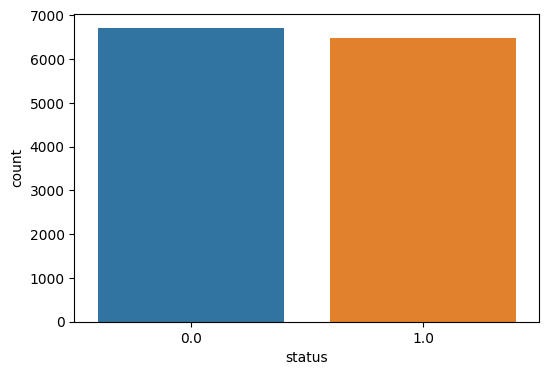

In [99]:
plt.figure(figsize = (6,4))
sns.countplot(x='status', data=dataframe)
plt.show()

# One Hot Encoding

In [100]:
X = dataframe.drop(['status'],axis=1)
X.shape

(13188, 53)

In [101]:
obj = (X.dtypes == 'object')
object_cols_X = list(obj[obj].index)
object_cols_X

['grade_biologi_odd',
 'kkm_biologi_odd',
 'grade_biologi_even',
 'kkm_fisika_odd',
 'kkm_fisika_even',
 'kkm_kimia_even',
 'grade_sosiologi_odd',
 'kkm_sosiologi_odd',
 'grade_geografi_odd',
 'kkm_geografi_even',
 'grade_ekonomi_even',
 'kkm_ekonomi_even',
 'grade_matematika_even',
 'grade_bahasa_inggris_odd',
 'kkm_bahasa_inggris_even',
 'kkm_bahasa_indonesia_odd',
 'grade_bahasa_indonesia_even',
 'kkm_bahasa_indonesia_even',
 'kkm_bahasa_mandarin_odd',
 'grade_bahasa_mandarin_even',
 'kkm_bahasa_mandarin_even',
 'grade_bahasa_jepang_even',
 'grade_bahasa_korea_odd',
 'kkm_bahasa_korea_odd',
 'kkm_bahasa_korea_even',
 'kkm_bahasa_jerman_odd',
 'kkm_bahasa_jerman_even',
 'name']

In [102]:
X_copy = X.copy()
X_copy.head()

,grade_biologi_odd,kkm_biologi_odd,grade_biologi_even,kkm_biologi_even,grade_fisika_odd,kkm_fisika_odd,grade_fisika_even,kkm_fisika_even,grade_kimia_odd,kkm_kimia_odd,...,kkm_bahasa_jepang_even,grade_bahasa_korea_odd,kkm_bahasa_korea_odd,grade_bahasa_korea_even,kkm_bahasa_korea_even,grade_bahasa_jerman_odd,kkm_bahasa_jerman_odd,grade_bahasa_jerman_even,kkm_bahasa_jerman_even,name
0,0,0,0,0.0,0.0,0,0.0,0,0.0,0.0,...,0.0,0,0,0.0,0,0.0,0,0.0,0,Sastra China
1,0,0,0,0.0,0.0,0,0.0,0,0.0,0.0,...,0.0,0,0,0.0,0,0.0,0,0.0,0,Psikologi
2,0,0,0,0.0,0.0,0,0.0,0,0.0,0.0,...,0.0,0,0,0.0,0,0.0,0,0.0,0,Seni Rupa dan Desain
3,0,0,0,0.0,0.0,0,0.0,0,0.0,0.0,...,0.0,0,0,0.0,0,0.0,0,0.0,0,Pendidikan Dokter
4,0,0,0,0.0,0.0,0,0.0,0,0.0,0.0,...,0.0,0,0,0.0,0,0.0,0,0.0,0,Sastra Inggris


In [103]:
OH_encoder = OneHotEncoder(handle_unknown='ignore',sparse_output=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(X[object_cols_X]))
OH_cols.index = X.index
num_X = X.drop(object_cols_X, axis=1)
OH_X = pd.concat([num_X, OH_cols], axis=1)
OH_X

,kkm_biologi_even,grade_fisika_odd,grade_fisika_even,grade_kimia_odd,kkm_kimia_odd,grade_kimia_even,grade_sosiologi_even,kkm_sosiologi_even,kkm_geografi_odd,grade_geografi_even,...,697,698,699,700,701,702,703,704,705,706
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,91.0,75.0,75.0,88.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13183,75.0,75.0,84.0,84.0,75.0,89.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13184,75.0,80.0,81.0,88.0,75.0,86.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13185,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13186,75.0,86.0,86.0,82.0,75.0,83.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [104]:
import numpy as np
y = dataframe['status'].values[:,np.newaxis]
y.shape

(13188, 1)

# Splitting Data

In [105]:
# split the data into training and testing sets
X_train_val, X_test, y_train_val, y_test = train_test_split(OH_X, y, test_size=0.2, random_state=42)

# split the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (8440, 732)
Number transactions y_train dataset:  (8440, 1)
Number transactions X_test dataset:  (2638, 732)
Number transactions y_test dataset:  (2638, 1)


In [106]:
# find the indices of NaN values in y_train
nan_indices = np.isnan(y_train)

# remove NaN values from X_train and y_train
X_train = X_train[~nan_indices]
y_train = y_train[~nan_indices]

# Random Forest

In [107]:
# create a random forest classifier with default hyperparameters
rf = RandomForestClassifier()

# Random Search

In [108]:
# define the hyperparameters to search over
param_distributions = {'n_estimators': [10, 50, 100, 200],
                       'max_depth': [None, 5, 10, 20],
                       'min_samples_split': [2, 5, 10],
                       'min_samples_leaf': [1, 2, 4]}

In [109]:
# Remove feature names from X
X_train = pd.DataFrame(X_train.values)

# Perform randomized search over the hyperparameters
random_search = RandomizedSearchCV(rf, param_distributions, n_iter=10, cv=5, error_score='raise')
random_search.fit(X_train, y_train)

# Fit the classifier to the data using the best hyperparameters found by randomized search
rf_best = random_search.best_estimator_
rf_best.fit(X_train, y_train)

RandomForestClassifier(min_samples_split=5, n_estimators=200)

# Classification Report

In [110]:
# generate predictions for the validation set and print a classification report
X_train.columns = X_train.columns.map(str)
X_val.columns = X_val.columns.map(str)
X_test.columns = X_test.columns.map(str)

In [111]:
y_pred = rf_best.predict(X_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

         0.0       0.99      0.95      0.97      1070
         1.0       0.95      0.99      0.97      1040

    accuracy                           0.97      2110
   macro avg       0.97      0.97      0.97      2110
weighted avg       0.97      0.97      0.97      2110



/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [112]:
# make predictions on the testing set and evaluate the performance
y_test_pred = rf_best.predict(X_test)
print(classification_report(y_test, y_test_pred))

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


              precision    recall  f1-score   support

         0.0       0.99      0.95      0.97      1337
         1.0       0.95      0.99      0.97      1301

    accuracy                           0.97      2638
   macro avg       0.97      0.97      0.97      2638
weighted avg       0.97      0.97      0.97      2638



# Plot Tree

[[0.01833333 0.98166667]]


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


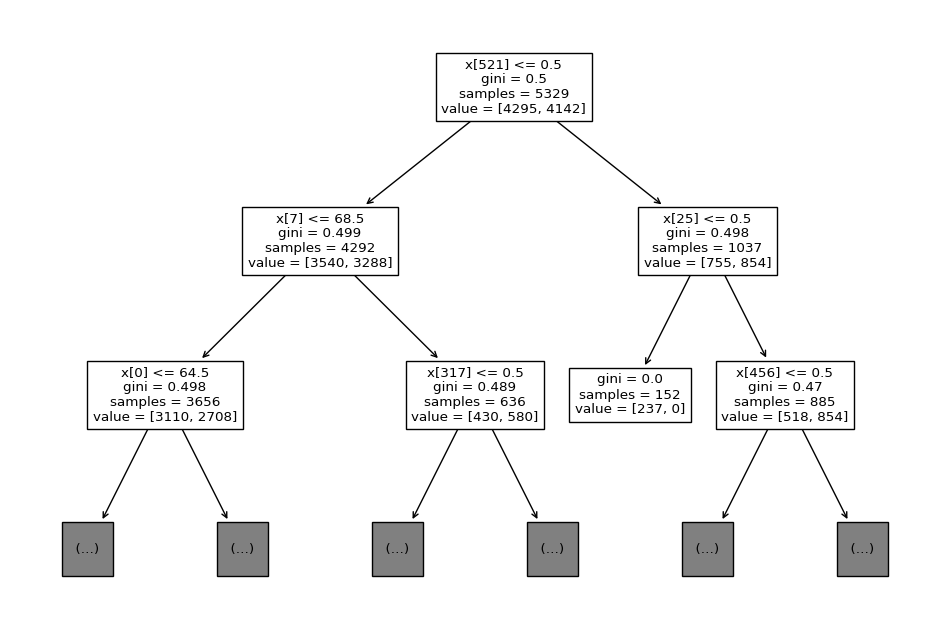

In [113]:
# plot the first decision tree in the random forest
fig, ax = plt.subplots(figsize=(12, 8))
plot_tree(rf_best.estimators_[0], max_depth=2, ax=ax)

# to visualize the probability of each class at each node, use the `predict_proba` method on the entire random forest.
# for example, to predict the probability of each class for the first instance in the test set:
probs = rf_best.predict_proba(X_test[:1])
print(probs)

# ROC

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


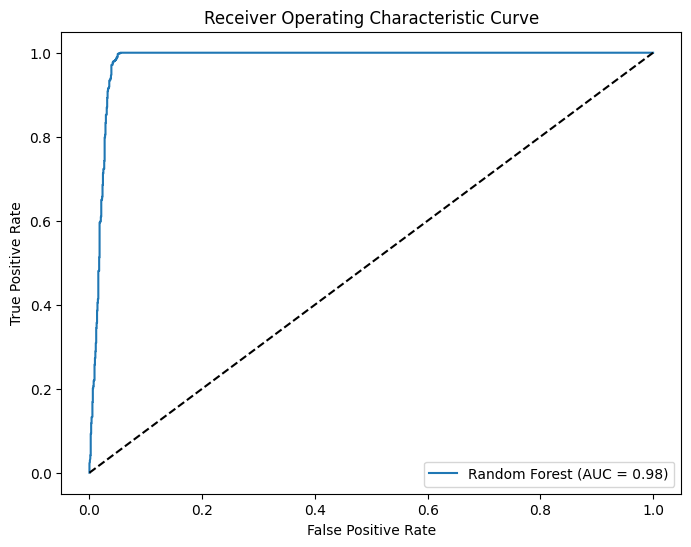

In [114]:
# predict class probabilities for test set
y_pred_proba = rf_best.predict_proba(X_test)[:, 1]
# calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)
# plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Random Forest (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc='lower right')

# Confusion Matrix

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Text(0.5, 1.0, 'Confusion Matrix')

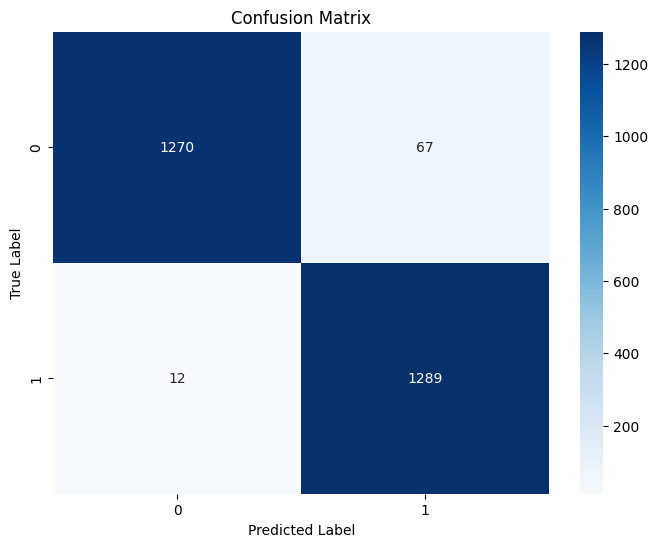

In [115]:
# calculate confusion matrix
y_pred = rf_best.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
# plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

# Save Model

In [116]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# save the model to an HDF5 file
model.save('model.h5')

# Load Model

In [ ]:
# from tensorflow.keras.models import load_model
# model = load_model('model.h5')